<a href="https://colab.research.google.com/github/shahjamanbadhon/Data-Mining/blob/main/Lab5_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [168]:
import pandas as pd
import numpy as np

Read Data

In [169]:
data = pd.read_csv('https://raw.githubusercontent.com/shahjamanbadhon/Data-Mining/refs/heads/main/play_golf.csv')

In [170]:
data

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY GOLF
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


Ordinal Encoding

In [171]:
from sklearn.preprocessing import OrdinalEncoder

In [172]:
ore = OrdinalEncoder(categories=[['Rainy','Overcast','Sunny']])

In [173]:
data['OUTLOOK'] = ore.fit_transform(data[['OUTLOOK']])


In [174]:
data

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY GOLF
0,0.0,Hot,High,False,No
1,0.0,Hot,High,True,No
2,1.0,Hot,High,False,Yes
3,2.0,Mild,High,False,Yes
4,2.0,Cool,Normal,False,Yes
5,2.0,Cool,Normal,True,No
6,1.0,Cool,Normal,True,Yes
7,0.0,Mild,High,False,No
8,0.0,Cool,Normal,False,Yes
9,2.0,Mild,Normal,False,Yes


In [175]:
oxe = OrdinalEncoder(categories=[['Hot','Mild','Cool']])

In [176]:
data['TEMPERATURE'] = oxe.fit_transform(data[['TEMPERATURE']])

In [177]:
one = OrdinalEncoder(categories=[['High','Normal']])

In [178]:
data['HUMIDITY'] = one.fit_transform(data[['HUMIDITY']])

Label Encoding

In [179]:
from sklearn.preprocessing import LabelEncoder

In [180]:
owe = OrdinalEncoder(categories=[['Yes','No']])

In [181]:
data['PLAY GOLF'] = owe.fit_transform(data[['PLAY GOLF']])

In [182]:
data

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY GOLF
0,0.0,0.0,0.0,False,1.0
1,0.0,0.0,0.0,True,1.0
2,1.0,0.0,0.0,False,0.0
3,2.0,1.0,0.0,False,0.0
4,2.0,2.0,1.0,False,0.0
5,2.0,2.0,1.0,True,1.0
6,1.0,2.0,1.0,True,0.0
7,0.0,1.0,0.0,False,1.0
8,0.0,2.0,1.0,False,0.0
9,2.0,1.0,1.0,False,0.0


Devide X and Y for Train

In [183]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

Train Test Split

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

Decision Tree Classifier

In [186]:
from sklearn.tree import DecisionTreeClassifier

In [187]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42) # with entropy,initially Gini

In [188]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [189]:
from sklearn import tree
import matplotlib.pyplot as plt

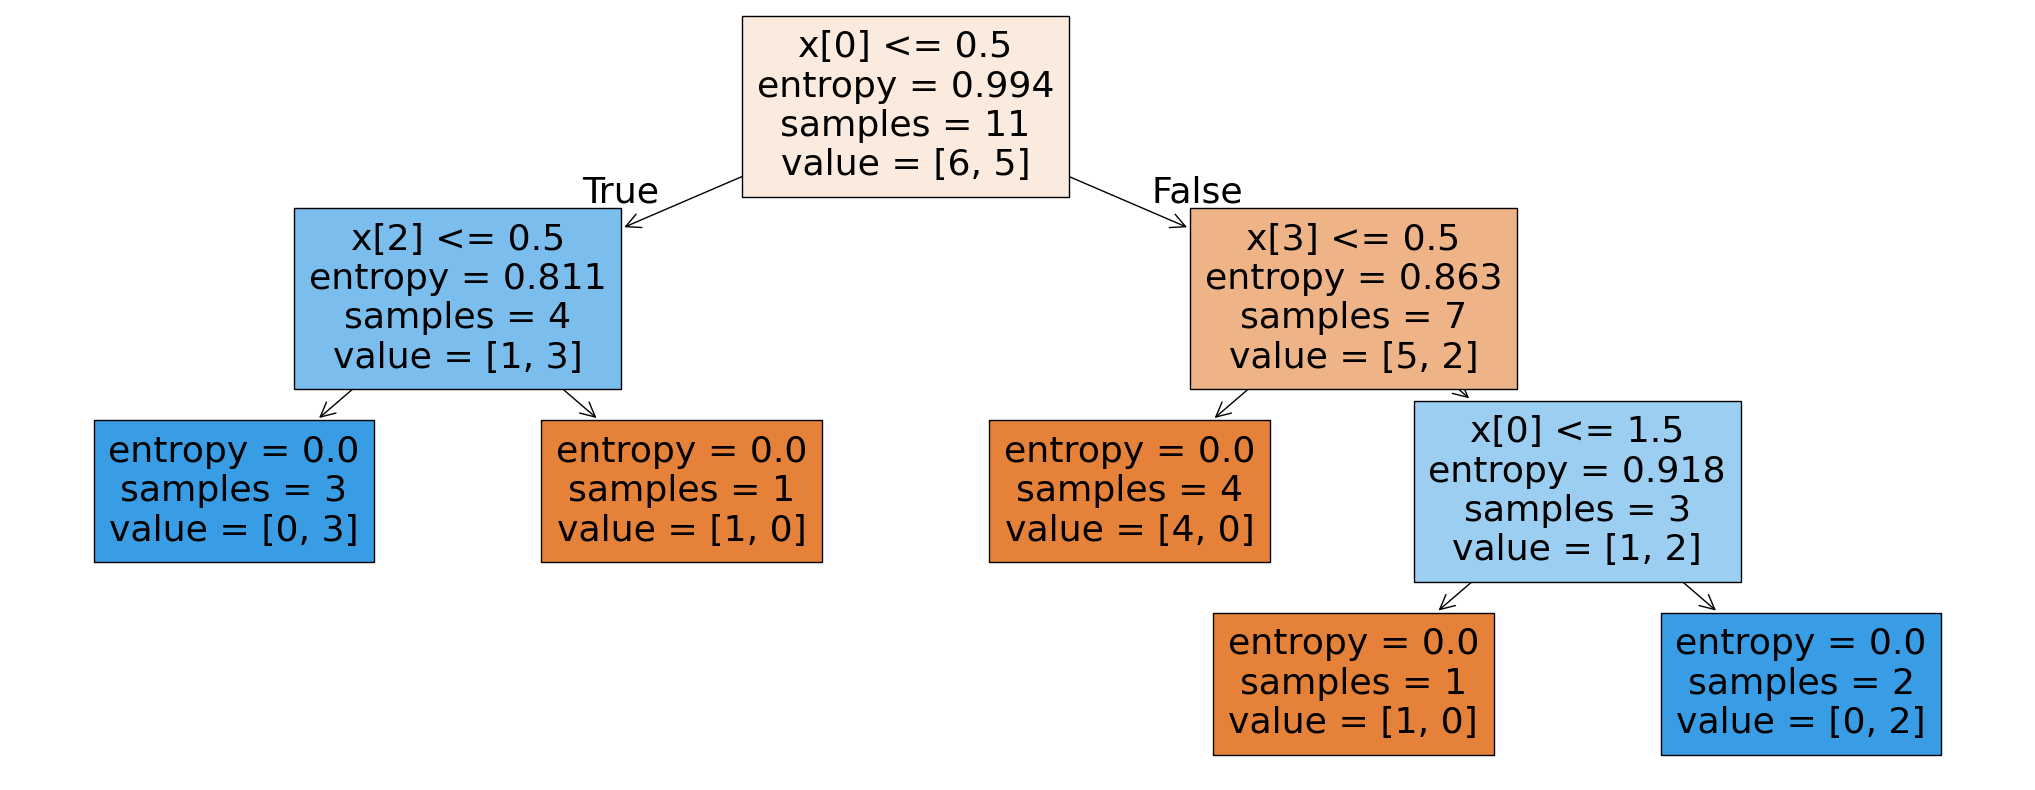

In [190]:
plt.figure(figsize=(26,10))
tree.plot_tree(dt,filled=True)
plt.show()

In [191]:
x_test

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY
12,1.0,0.0,1.0,False
6,1.0,2.0,1.0,True
8,0.0,2.0,1.0,False


In [192]:
y_pred = dt.predict(x_test)
y_pred

array([0., 0., 0.])

In [193]:
y_test

,PLAY GOLF
12,0.0
6,0.0
8,0.0


In [194]:
from sklearn.metrics import accuracy_score

In [195]:
accuracy_score(y_pred,y_test)*100

100.0

In [196]:
from sklearn.metrics import classification_report

In [197]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [198]:
from sklearn.naive_bayes import GaussianNB

In [199]:
nb = GaussianNB()

In [200]:
nb.fit(x_train,y_train)

GaussianNB()

In [201]:
y_pred = nb.predict(x_test)
y_pred

array([0., 0., 0.])

In [202]:
accuracy_score(y_pred,y_test)*100

100.0

In [203]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

